# TUGAS BENGKOD 6 Oktober 2025
## Nama : Laurentius Joandanu
## NIM    : A11.2022.14179


### Import Libary
code dibawah untuk import libary yang digunakan

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score, KFold


### Mount Drive
Fungsi code dibawah ini untuk mengambil data dari drive

In [54]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Definisikan Kolom
Fungsi code dibawah ini untuk memberi nama / definisi tiap tiap kolom / fitur
*   Age ( Umur )
*   Workclass ( Status Pekerjaan )
*   Fnlwgt ( Bobot akhir sensus yang menunjukkan berapa banyak orang di populasi yang diwakili oleh responden ini )
*   Education ( Pendidkan yang dicapai )
*   Education-num ( Pendidikan versi numerik )
*   Marital-status ( Status pernikahan )
*   Occupation ( Jenis pekerjaan utaama yang dilakukan )
*   Relationship ( Hubungan individu sebagai kepala keluarga )
*   Race ( Kategori ras individu )
*   Sex ( Jenis kelamin )
*   Capital-gain ( Jumlah keuntungan dalam setahun )
*   Capital-loss ( Jumlah kerugian dalam setahun )
*   Hours-per-week ( Jam kerja per minggu )
*   Native-country ( Negara asal )
*   Income ( Label target antara <=50K dan >50K )










In [55]:
# Definisikan nama kolom sesuai dokumentasi UCI
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

### Cek Dataset
Fungsi code dibawah ini untuk membaca data 10 baris

In [56]:
# Cek Dataset
df = pd.read_csv('/content/drive/My Drive/Bengkel Koding/census+income/adult.data',header=None,names=column_names,na_values="?",skipinitialspace=True )

# Baca dataset
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Cek Tipedata dan Data Unique
Fungsi code dibawah ini untuk mengecek tipedata tiap fitur / kolom apakah integer, float, object dan mengecek apakah ada nilai unique di tiap tiap kolom

In [57]:
# Cek tipe data
df.info()

# Cek nilai kolom kategorikal
for column in df.columns:
  if df[column].dtypes == 'object':
    print(f"\nColumn: {column}")
    print(df[column].nunique())
    print(df[column].unique())

# Cek nilai kolom numerikal
for column in df.columns:
  if df[column].dtypes == 'int64':
    print(f"\nColumn: {column}")
    print(df[column].nunique())
    print(df[column].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Column: workclass
8
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan


### Memeriksa statistik
Fungsi code dibawah ini untuk meringkas data tersebut dari count, mean, std, min, 25%, 50%, 75%, max

In [58]:
# Memeriksa ringkasan statistik
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Cek Missing Value
### Fungsi code dibawah ini untuk mengecek apakah data tersebut ada missing value dan setelah di cek data tersebut ada missing valuenya di fitur workclass, occupation, native-country
### Karena jumlah missing valuenya dibawah 5% maka dilakukan penghapusan

In [59]:
# Cek missing value
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


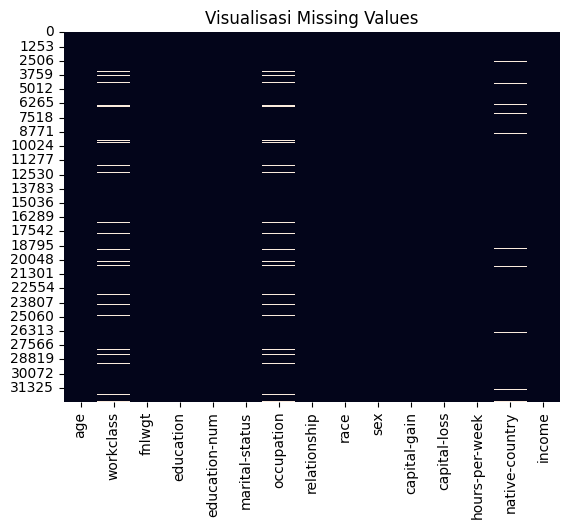

In [60]:
# Visualisasi missing value
sns.heatmap(df.isnull(), cbar=False)
plt.title('Visualisasi Missing Values')
plt.show()

In [61]:
# Handling missing value
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-3808521893.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [62]:
# Pastikan sudah bersih
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


### Cek Duplikat
Fungsi code dibawah ini untuk mengecek apakah data tersebut ada data duplikat dan setelah dijalankan data tersebut memiliki data duplikat dan dilakukan penghapusan dikarenakan data duplikatnya dibawah 5%

In [63]:
print("Jumlah data sebelum:", df.shape)
df.drop_duplicates(inplace=True)
print("Jumlah data setelah:", df.shape)

Jumlah data sebelum: (32561, 15)
Jumlah data setelah: (32537, 15)


### Cek Outlier
Fungsi diabawah untuk mengecek outlier dan di visualisasikan dan melakukan penghapusan data dikarekan data yang outlier dibawah 5%

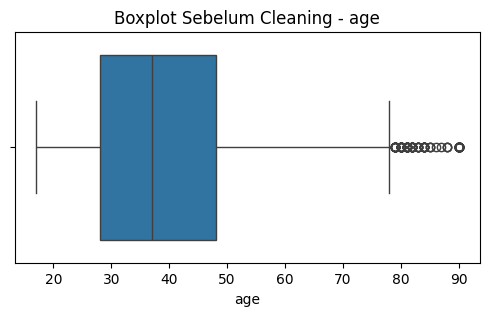

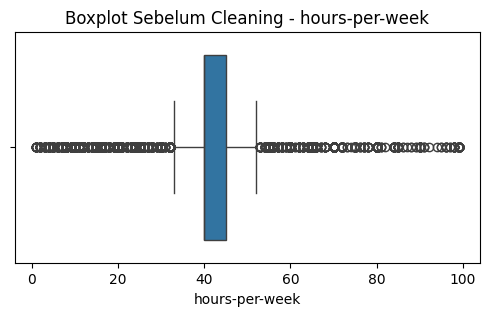

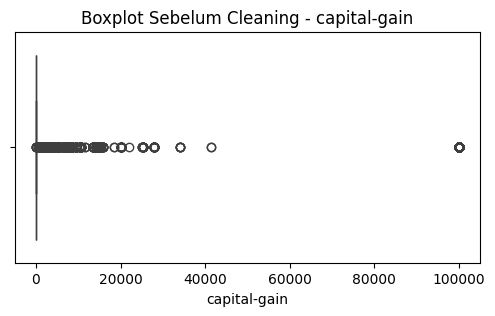

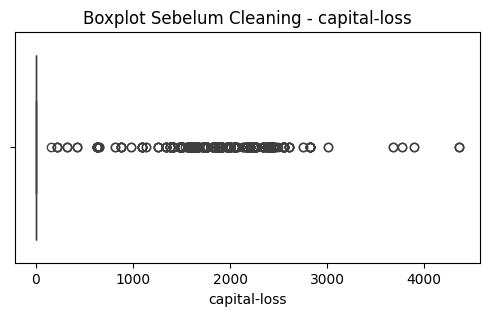

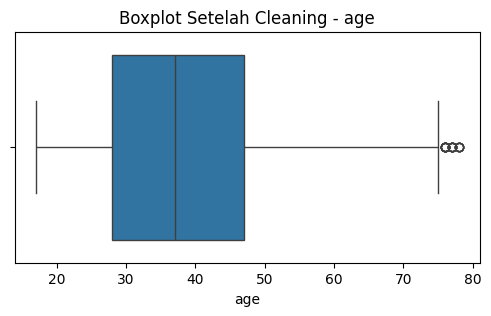

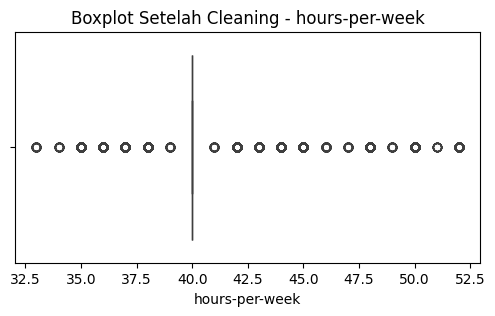

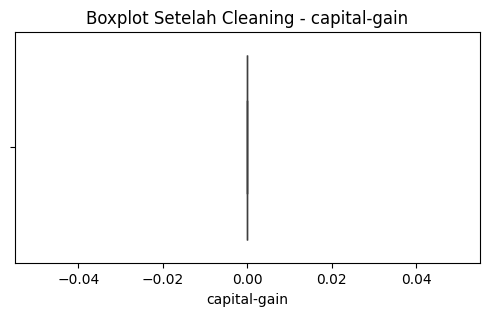

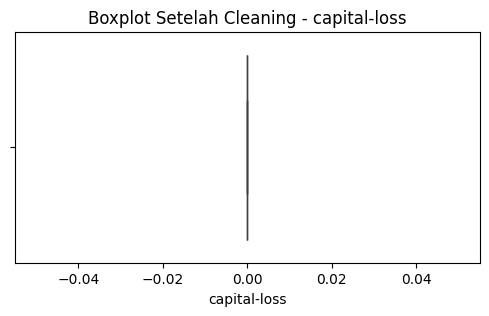

In [64]:
def detect_outlier_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] < lower) | (data[col] > upper)]

# Visualisasi sebelum
for col in ['age', 'hours-per-week', 'capital-gain', 'capital-loss']:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot Sebelum Cleaning - {col}')
    plt.show()

# Hapus outlier
for col in ['age', 'hours-per-week', 'capital-gain', 'capital-loss']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Visualisasi sesudah
for col in ['age', 'hours-per-week', 'capital-gain', 'capital-loss']:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot Setelah Cleaning - {col}')
    plt.show()


### Cek Imbalance
Fungsi code dibawah untuk mengecek data tersebut balance atau imbalance dan visualisasinya

/tmp/ipython-input-566194455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='income', palette='viridis')


Text(0, 0.5, 'Count')

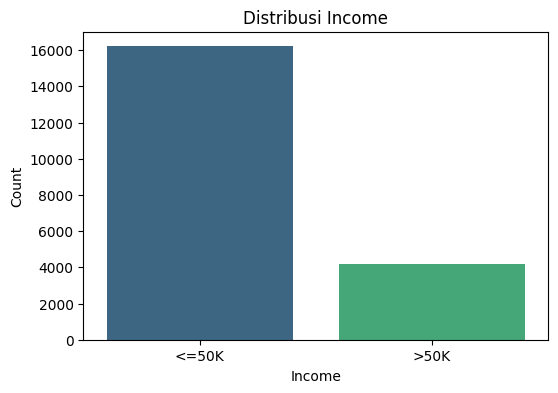

In [65]:
# Cek Imbalance Data
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='income', palette='viridis')
plt.title('Distribusi Income')
plt.xlabel('Income')
plt.ylabel('Count')

### Encode Data
Encode data menggunakan LabelEncoder, Langkah ini dilakukan agar seluruh kolom di dataset memiliki nilai numerik,
karena sebagian besar model Machine Learning di scikit-learn (seperti Decision Tree, Logistic Regression, Random Forest, dll) tidak bisa memproses data dalam bentuk teks langsung maka merubahnya menjadi biner menggunakan one hot encoding.

In [66]:
# Konversi tipe data numerik jika perlu
df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')
df['education-num'] = pd.to_numeric(df['education-num'], errors='coerce').astype('Int64')

# Label Encoder untuk target
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

# Label Encoder untuk kolom biner
df['sex'] = le.fit_transform(df['sex'])

# One-Hot Encoding untuk kategori nominal
df = pd.get_dummies(df, columns=['workclass','education','marital-status','occupation',
                                 'relationship','race','native-country'], drop_first=True)

df.head()


,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
2,38,215646,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False
5,37,284582,14,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
7,52,209642,9,1,0,0,45,1,False,False,...,False,False,False,False,False,False,False,True,False,False


### Split Data
Langkah ini bertujuan untuk:

*   Memisahkan fitur dan label, supaya model tahu mana variabel masukan dan mana target yang harus diprediksi.
* Membagi data menjadi train dan test set, agar performa model bisa dievaluasi secara obyektif (tidak hanya diukur pada data yang sama dengan data latih).

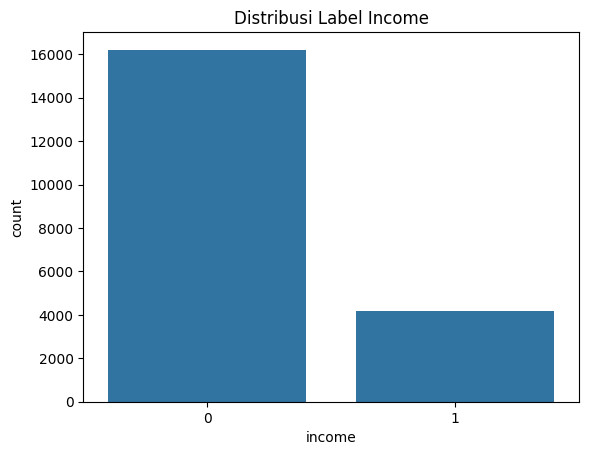

income
0    0.795466
1    0.204534
Name: proportion, dtype: float64


In [67]:
# Split data
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualisasi distribusi label
sns.countplot(x=y)
plt.title("Distribusi Label Income")
plt.show()

# Tentukan kolom kategorikal dan numerik
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

print(y.value_counts(normalize=True))


In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Decission Tree
Kode ini bertujuan untuk:
* Membangun model klasifikasi menggunakan algoritma Decision Tree berdasarkan dataset Census Income.
* Melatih model dengan data latih (X_train, y_train) agar mampu mempelajari hubungan antara fitur (seperti usia, pendidikan, pekerjaan, dll) dengan target (income).
* Menguji performa model pada data uji (X_test, y_test) dan menilai hasilnya melalui metrik akurasi, presisi, recall, F1-score, serta confusion matrix.

===== Evaluasi Model: Decision Tree =====
Akurasi : 0.7833660451422964
Presisi : 0.7877032447877722
Recall  : 0.7833660451422964
F1 Score: 0.7854418484687717

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      3264
           1       0.46      0.48      0.47       812

    accuracy                           0.78      4076
   macro avg       0.66      0.67      0.67      4076
weighted avg       0.79      0.78      0.79      4076



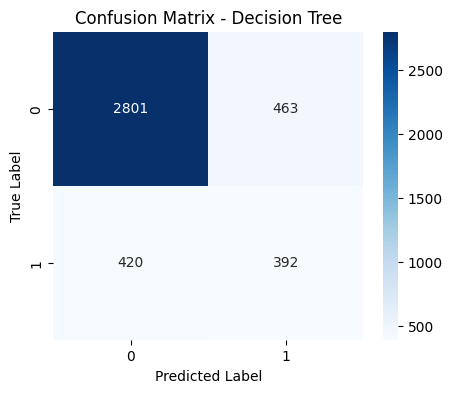

In [69]:
# Decission Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

print("===== Evaluasi Model: Decision Tree =====")
print("Akurasi :", accuracy_score(y_test, y_pred_dt))
print("Presisi :", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall  :", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Penjelasan Hasil :

* Akurasi → menunjukkan persentase prediksi model yang benar terhadap seluruh data uji.
akurasi 0.78, berarti 78% prediksi model sesuai dengan data sebenarnya.

* Presisi (Precision) → menggambarkan seberapa banyak prediksi “berpenghasilan >50K” yang benar dari semua prediksi positif model.
Presisi tinggi berarti model jarang salah mengira orang berpenghasilan rendah sebagai tinggi.

* Recall → menunjukkan seberapa banyak kasus “>50K” yang berhasil ditemukan model dari seluruh orang yang memang berpenghasilan >50K.
Jika recall rendah, berarti masih banyak orang berpenghasilan tinggi yang tidak terdeteksi.

* F1-Score → nilai gabungan dari presisi dan recall; semakin tinggi berarti keseimbangan performa model semakin baik.

* Classification Report → menampilkan keempat metrik di atas untuk masing-masing kelas (<=50K dan >50K).
Biasanya pada dataset ini, kelas <=50K (mayoritas) punya nilai presisi dan recall lebih tinggi dibanding >50K (minoritas).

* Confusion Matrix → memperlihatkan jumlah prediksi benar dan salah untuk tiap kelas:
Diagonal utama (kiri atas & kanan bawah) menunjukkan prediksi benar.
Nilai di luar diagonal menunjukkan kesalahan model (misalnya orang berpenghasilan >50K dikira <=50K).

### Logistic Regression
Kode ini bertujuan untuk:

* Membangun model klasifikasi Logistic Regression untuk memprediksi apakah seseorang memiliki penghasilan lebih dari 50K atau tidak berdasarkan fitur demografis dari dataset Census Income.
* Menstandarkan (menormalisasi) skala fitur dengan StandardScaler, agar semua variabel memiliki rentang nilai yang seimbang dan mempercepat proses konvergensi model.
* Melatih model pada data latih (X_train_scale, y_train) dan menguji performa pada data uji (X_test_scale, y_test).
* Mengevaluasi hasil model berdasarkan metrik akurasi, presisi, recall, F1-score, dan confusion matrix.

===== Evaluasi Model: Logistic Regression =====
Akurasi : 0.8476447497546614
Presisi : 0.8372489242516851
Recall  : 0.8476447497546614
F1 Score: 0.8400478234322054

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      3264
           1       0.65      0.50      0.57       812

    accuracy                           0.85      4076
   macro avg       0.77      0.72      0.74      4076
weighted avg       0.84      0.85      0.84      4076



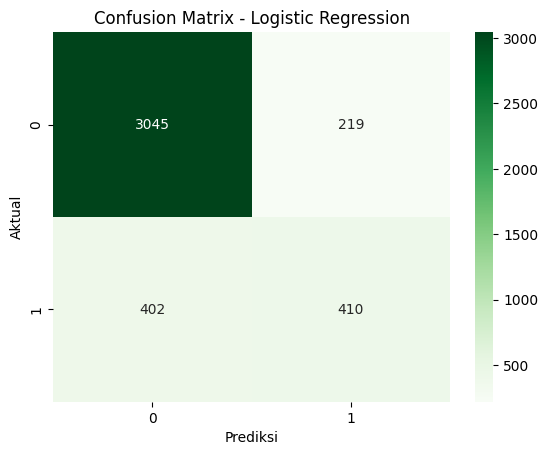

In [70]:
# Logistic Regression
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scale, y_train)

y_pred_lr = lr_model.predict(X_test_scale)

print("===== Evaluasi Model: Logistic Regression =====")
print("Akurasi :", accuracy_score(y_test, y_pred_lr))
print("Presisi :", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall  :", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Penjelasan Hasil :

* Akurasi → menunjukkan persentase prediksi model yang benar terhadap seluruh data uji.
akurasi 0.84, berarti 84% prediksi model sesuai dengan data sebenarnya.
Model ini lebih tinggi akurasinya dibanding model Decission Tree

* Presisi (Precision) → menggambarkan seberapa banyak prediksi “berpenghasilan >50K” yang benar dari semua prediksi positif model.
Presisi tinggi berarti model jarang salah mengira orang berpenghasilan rendah sebagai tinggi.

* Recall → menunjukkan seberapa banyak kasus “>50K” yang berhasil ditemukan model dari seluruh orang yang memang berpenghasilan >50K.
Jika recall rendah, berarti masih banyak orang berpenghasilan tinggi yang tidak terdeteksi.

* F1-Score → nilai gabungan dari presisi dan recall; semakin tinggi berarti keseimbangan performa model semakin baik.

* Classification Report → menampilkan keempat metrik di atas untuk masing-masing kelas (<=50K dan >50K).
Biasanya pada dataset ini, kelas <=50K (mayoritas) punya nilai presisi dan recall lebih tinggi dibanding >50K (minoritas).

* Confusion Matrix → memperlihatkan jumlah prediksi benar dan salah untuk tiap kelas:
Diagonal utama (kiri atas & kanan bawah) menunjukkan prediksi benar.
Nilai di luar diagonal menunjukkan kesalahan model (misalnya orang berpenghasilan >50K dikira <=50K).

### Perbandingan
Analisis Perbandingan

* Akurasi & Recall
Logistic Regression menunjukkan nilai akurasi tertinggi (84%) dan recall yang juga lebih baik daripada Decision Tree (84% vs 78%).
Ini berarti model Logistic Regression lebih konsisten dalam mengenali seluruh data dengan benar, termasuk sebagian besar data dari kelas minoritas (>50K).

* Presisi & F1-Score
Logistic Regressiom juga unggul dalam presisi (83%) dan F1-score (84%), menunjukkan bahwa model ini lebih tepat dalam memberikan label positif (lebih sedikit false positive) dan menjaga keseimbangan antara presisi dan recall.

### Kesimpulan
Logistic Regression menghasilkan akurasi dan recall tertinggi, sehingga lebih baik secara keseluruhan dalam memprediksi data baru dengan konsistensi tinggi.

Logistic Regression juga unggul dalam presisi dan F1-score, menandakan model ini sedikit lebih akurat dalam memprediksi label positif.

In [71]:
def evaluate_model(name, y_true, y_pred):
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("-"*50)


In [72]:
# --- Ordinal Encoder ---
oe = OrdinalEncoder()
X_oe = X.copy()
X_oe[cat_cols] = oe.fit_transform(X_oe[cat_cols])
df_oe = pd.concat([X_oe, y], axis=1)
print(df_oe.shape)

# --- One Hot Encoder ---
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_ohe = pd.DataFrame(ohe.fit_transform(X[cat_cols]))
X_ohe.columns = ohe.get_feature_names_out(cat_cols)
X_ohe = pd.concat([X[num_cols].reset_index(drop=True), X_ohe], axis=1)
df_ohe = pd.concat([X_ohe, y.reset_index(drop=True)], axis=1)
print(df_ohe.shape)


(20378, 97)
(20378, 8)


In [73]:
# Konversi tipe agar aman
X_oe = df_oe.drop('income', axis=1).astype(float)
y_oe = df_oe['income'].astype(int)
X_ohe = df_ohe.drop('income', axis=1).astype(float)
y_ohe = df_ohe['income'].astype(int)

smote = SMOTE(random_state=42)
under = RandomUnderSampler(random_state=42)

# --- Ordinal Encoder + SMOTE ---
X_oe_over, y_oe_over = smote.fit_resample(X_oe, y_oe)
df_oe_oversampled = pd.concat([X_oe_over, y_oe_over], axis=1)

# --- Ordinal Encoder + Undersampling ---
X_oe_under, y_oe_under = under.fit_resample(X_oe, y_oe)
df_oe_undersampled = pd.concat([X_oe_under, y_oe_under], axis=1)

# --- One Hot Encoder + SMOTE ---
X_ohe_over, y_ohe_over = smote.fit_resample(X_ohe, y_ohe)
df_ohe_oversampled = pd.concat([X_ohe_over, y_ohe_over], axis=1)

# --- One Hot Encoder + Undersampling ---
X_ohe_under, y_ohe_under = under.fit_resample(X_ohe, y_ohe)
df_ohe_undersampled = pd.concat([X_ohe_under, y_ohe_under], axis=1)


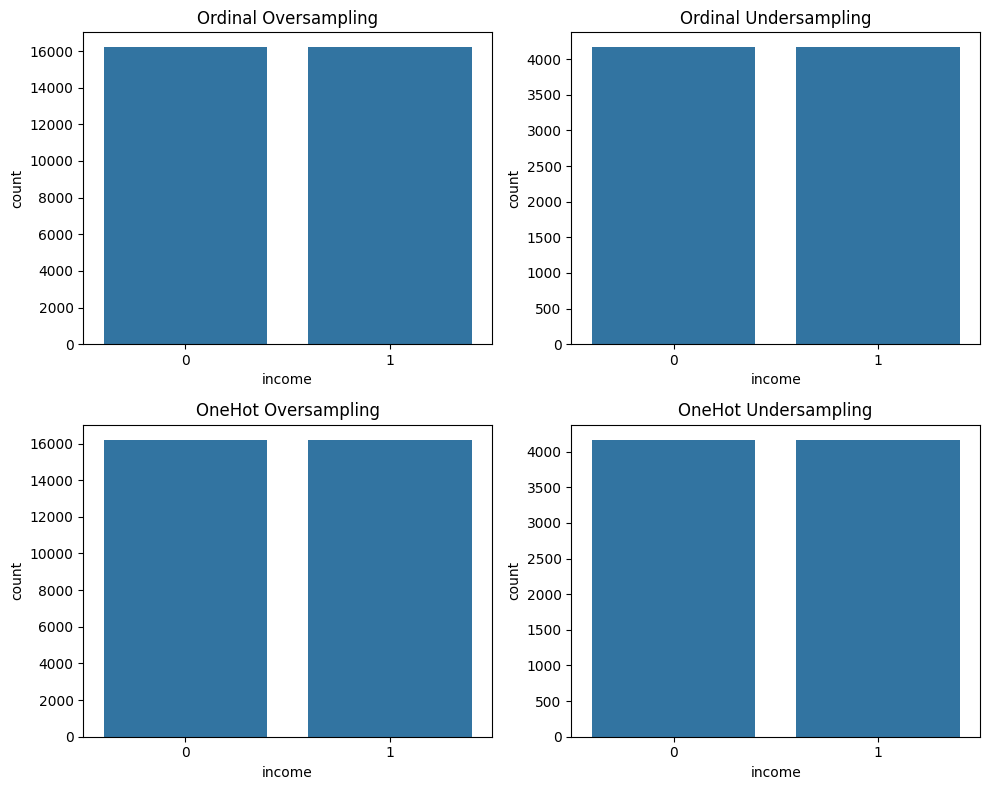

In [74]:
# 6️⃣ Visualisasi Distribusi Hasil Sampling
datasets = {
    "Ordinal Oversampling": y_oe_over,
    "Ordinal Undersampling": y_oe_under,
    "OneHot Oversampling": y_ohe_over,
    "OneHot Undersampling": y_ohe_under
}

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for ax, (title, data_y) in zip(axes.flatten(), datasets.items()):
    sns.countplot(x=data_y, ax=ax)
    ax.set_title(title)
plt.tight_layout()
plt.show()

In [77]:
# 7️⃣ Evaluasi Model dengan Cross Validation

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000, solver='lbfgs')
}

def evaluate_cv(X, y, models):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = []
    for name, model in models.items():
        acc = cross_val_score(model, X, y, cv=kf, scoring='accuracy').mean()
        prec = cross_val_score(model, X, y, cv=kf, scoring='precision').mean()
        rec = cross_val_score(model, X, y, cv=kf, scoring='recall').mean()
        f1 = cross_val_score(model, X, y, cv=kf, scoring='f1').mean()
        results.append([name, acc, prec, rec, f1])
    return pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Jalankan evaluasi untuk semua kombinasi
eval_results = {
    "OE + SMOTE": evaluate_cv(X_oe_over, y_oe_over, models),
    "OE + Undersampling": evaluate_cv(X_oe_under, y_oe_under, models),
    "OHE + SMOTE": evaluate_cv(X_ohe_over, y_ohe_over, models),
    "OHE + Undersampling": evaluate_cv(X_ohe_under, y_ohe_under, models)
}


KeyboardInterrupt: 

In [ ]:
# 8️⃣ Tampilkan Hasil Evaluasi
for title, df_res in eval_results.items():
    print(f"\n=== {title} ===")
    display(df_res)